In [1]:
library(GLMsData)
data(nambeware)

In [2]:
str(nambeware)

'data.frame':	59 obs. of  4 variables:
 $ Type : Factor w/ 5 levels "Bowl","CassDish",..: 2 2 2 1 3 2 5 5 3 3 ...
 $ Diam : num  10.7 14 9 8 10 10.5 16 15 6.5 5 ...
 $ Time : num  47.6 63.1 58.8 34.9 55.5 ...
 $ Price: num  144 215 105 69 134 129 155 99 38.5 36.5 ...


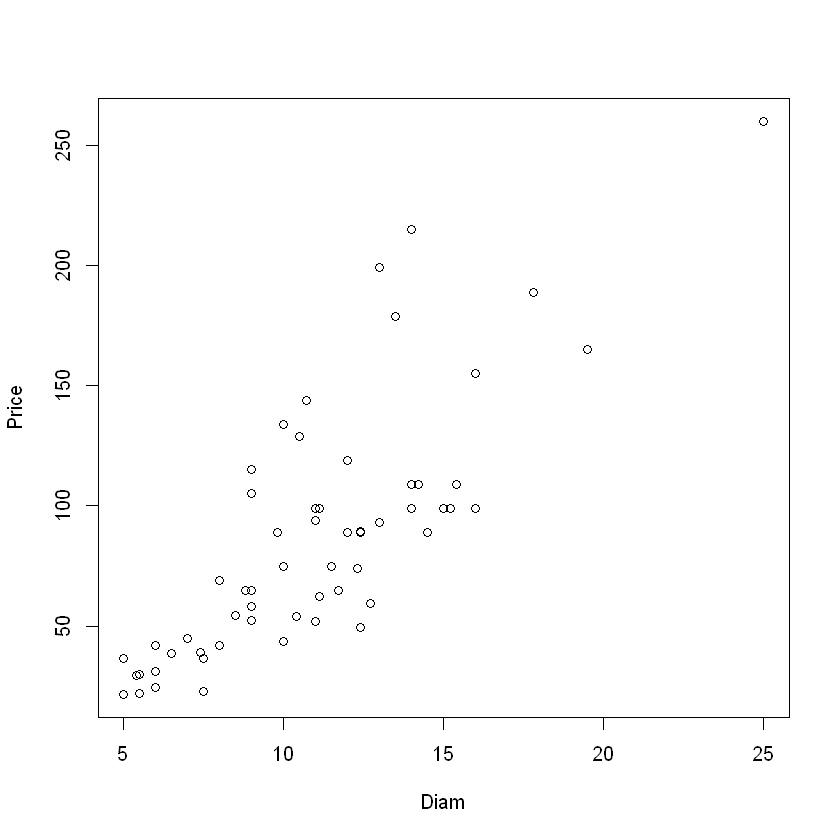

In [3]:
plot(Price ~ Diam, data=nambeware)

In [4]:
gamma.lm <- glm(Price ~ Diam, family = Gamma(link="log"), data=nambeware)

In [5]:
coef(summary(gamma.lm))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.9629331,0.15618048,18.971213,2.655723e-26
Diam,0.1272179,0.01349224,9.428973,3.100673e-13


In [6]:
anova(gamma.lm, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,58,20.267870,NA,NA
Diam,1,12.47417,57,7.793702,79.59257,2.074969e-12


In [9]:
# Goodness of fit test

# Deviance
gof.dev <- deviance(gamma.lm)

# Pearson

gof.pearson <- sum(gamma.lm$weights * gamma.lm$residuals^2)

gof.dev
gof.pearson

qchisq(0.95, df.residual(gamma.lm))

[1] 7.793702

[1] 8.933342

[1] 75.62375

In [11]:
# Standard error

coef(summary(gamma.lm))

sqrt(summary(gamma.lm)$cov.scaled)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.9629331,0.15618048,18.971213,2.655723e-26
Diam,0.1272179,0.01349224,9.428973,3.100673e-13


Warning message in sqrt(summary(gamma.lm)$cov.scaled):
"NaNs produced"

,(Intercept),Diam
(Intercept),0.1561805,NaN
Diam,NaN,0.01349224


In [13]:
dev.phi <- deviance(gamma.lm) / df.residual(gamma.lm)
pearson.phi <- sum(gamma.lm$weights * gamma.lm$residuals^2)/df.residual(gamma.lm)

dev.phi
pearson.phi
summary(gamma.lm)$dispersion

[1] 0.1367316

[1] 0.1567253

[1] 0.1567253

In [18]:
deviance(gamma.lm)

[1] 7.793702

In [20]:
library(mdscore)

Warning message:
"package 'mdscore' was built under R version 3.6.3"Loading required package: MASS


In [21]:
wald.test(gamma.lm, 2)

$W
[1] 107.7511

$pvalue
[1] 3.047506e-25

attr(,"class")
[1] "wald.test"